<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/Sentiment_Analysis(NLP)_Lab_Intro_to_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install textblob
!pip install neattext
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

<ipython-input-5-dc804463564d>:5: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vaccine_tweets = pd.read_csv('covidvaccine.csv')


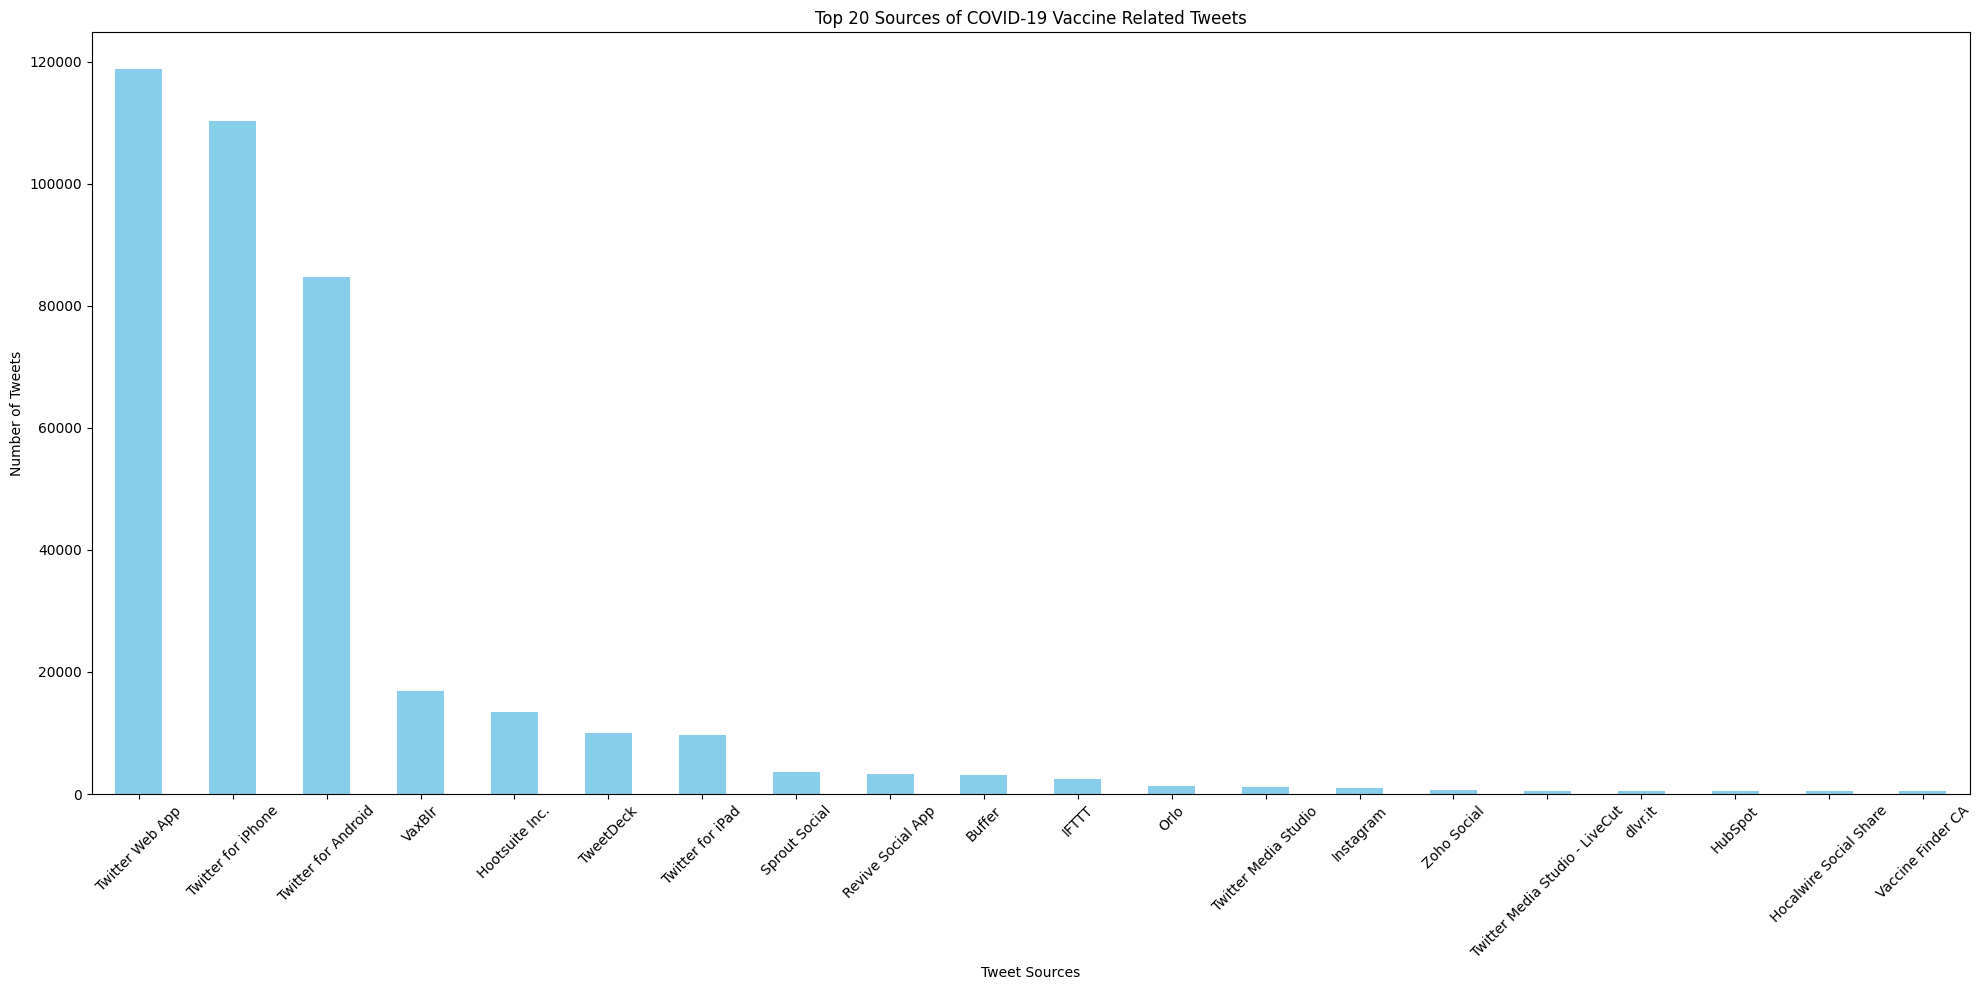

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_vaccine_tweets = pd.read_csv('covidvaccine.csv')

plt.figure(figsize=(20,10))
df_vaccine_tweets['source'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')

plt.xticks(rotation=45)
plt.title('Top 20 Sources of COVID-19 Vaccine Related Tweets')
plt.xlabel('Tweet Sources')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()


In [ ]:
import neattext.functions as nfx

df_vaccine_tweets['clean_text'] = df_vaccine_tweets['text'].astype(str)
df_vaccine_tweets['clean_text'] = df_vaccine_tweets['clean_text'].apply(nfx.remove_hashtags)
df_vaccine_tweets['clean_text'] = df_vaccine_tweets['clean_text'].apply(nfx.remove_multiple_spaces)
df_vaccine_tweets['clean_text'] = df_vaccine_tweets['clean_text'].apply(nfx.remove_urls)
df_vaccine_tweets['clean_text'] = df_vaccine_tweets['clean_text'].apply(nfx.remove_puncts)
df_vaccine_tweets['clean_text'] = df_vaccine_tweets['clean_text'].apply(nfx.remove_non_ascii)
df_vaccine_tweets['clean_text'] = df_vaccine_tweets['clean_text'].apply(nfx.remove_userhandles)


In [ ]:
df_vaccine_tweets['clean_text']




,clean_text
0,Australia to Manufacture Covid19 Vaccine and g...
1,Australia is doing very good
2,Deaths due to COVID19 in Affected Countries\nR...
3,Stay safe di amp da ...
4,This is what passes for leadership in our ...
...,...
399640,\n
399641,This is incredible Pfizer boss backtracking on...
399642,social services admits vaxxing sans permissio...
399643,The pharmaceutical industry would never lie to...


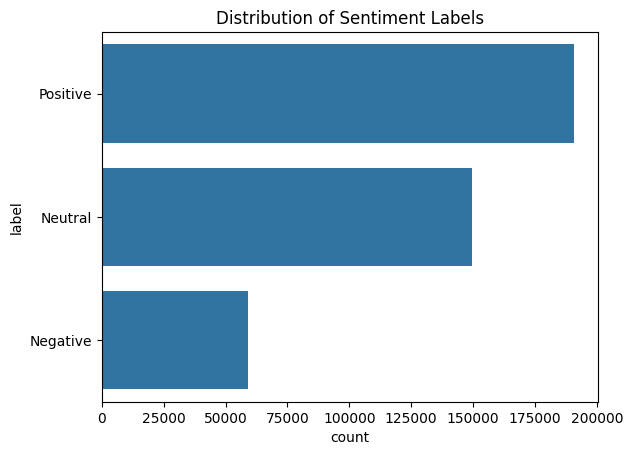

In [ ]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_sentiment(text):
    blob = TextBlob(text)
    sent_pol = blob.sentiment.polarity
    sent_sub = blob.sentiment.subjectivity
    if sent_pol > 0:
        sent_label = 'Positive'
    elif sent_pol < 0:
        sent_label = 'Negative'
    else:
        sent_label = 'Neutral'
    return {'polarity': sent_pol, 'subjectivity': sent_sub, 'label': sent_label}

df_vaccine_tweets['sentiment'] = df_vaccine_tweets['clean_text'].apply(get_sentiment)
df_vaccine_tweets = df_vaccine_tweets.join(pd.json_normalize(df_vaccine_tweets['sentiment']))

sns.countplot(df_vaccine_tweets['label'])
plt.title("Distribution of Sentiment Labels")
plt.show()


In [ ]:
import nltk
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


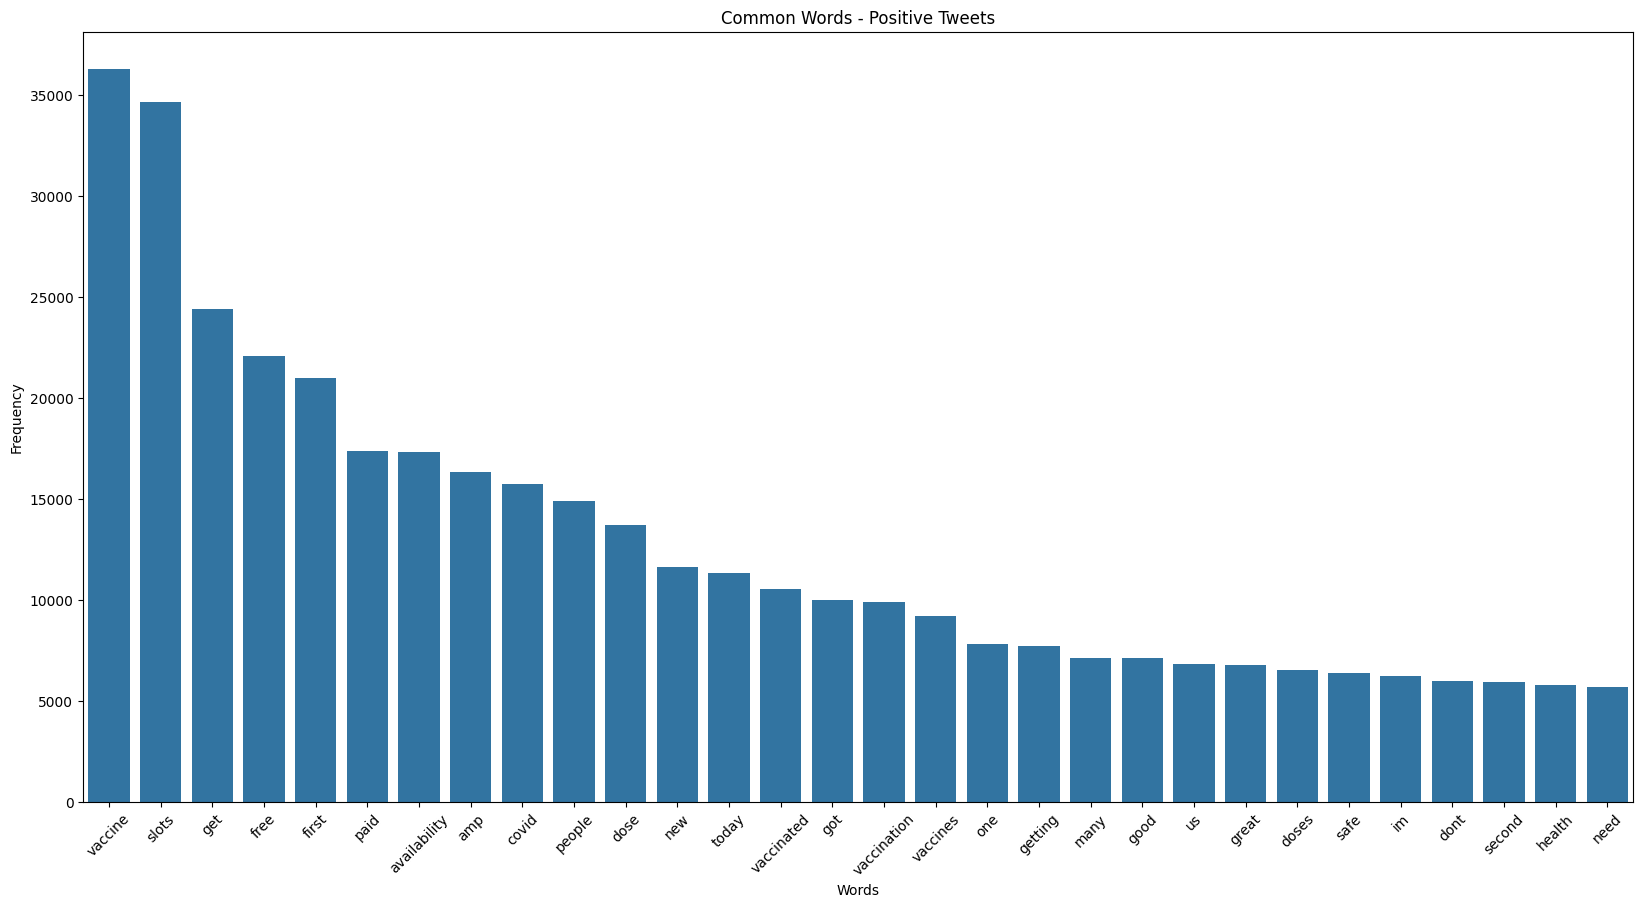

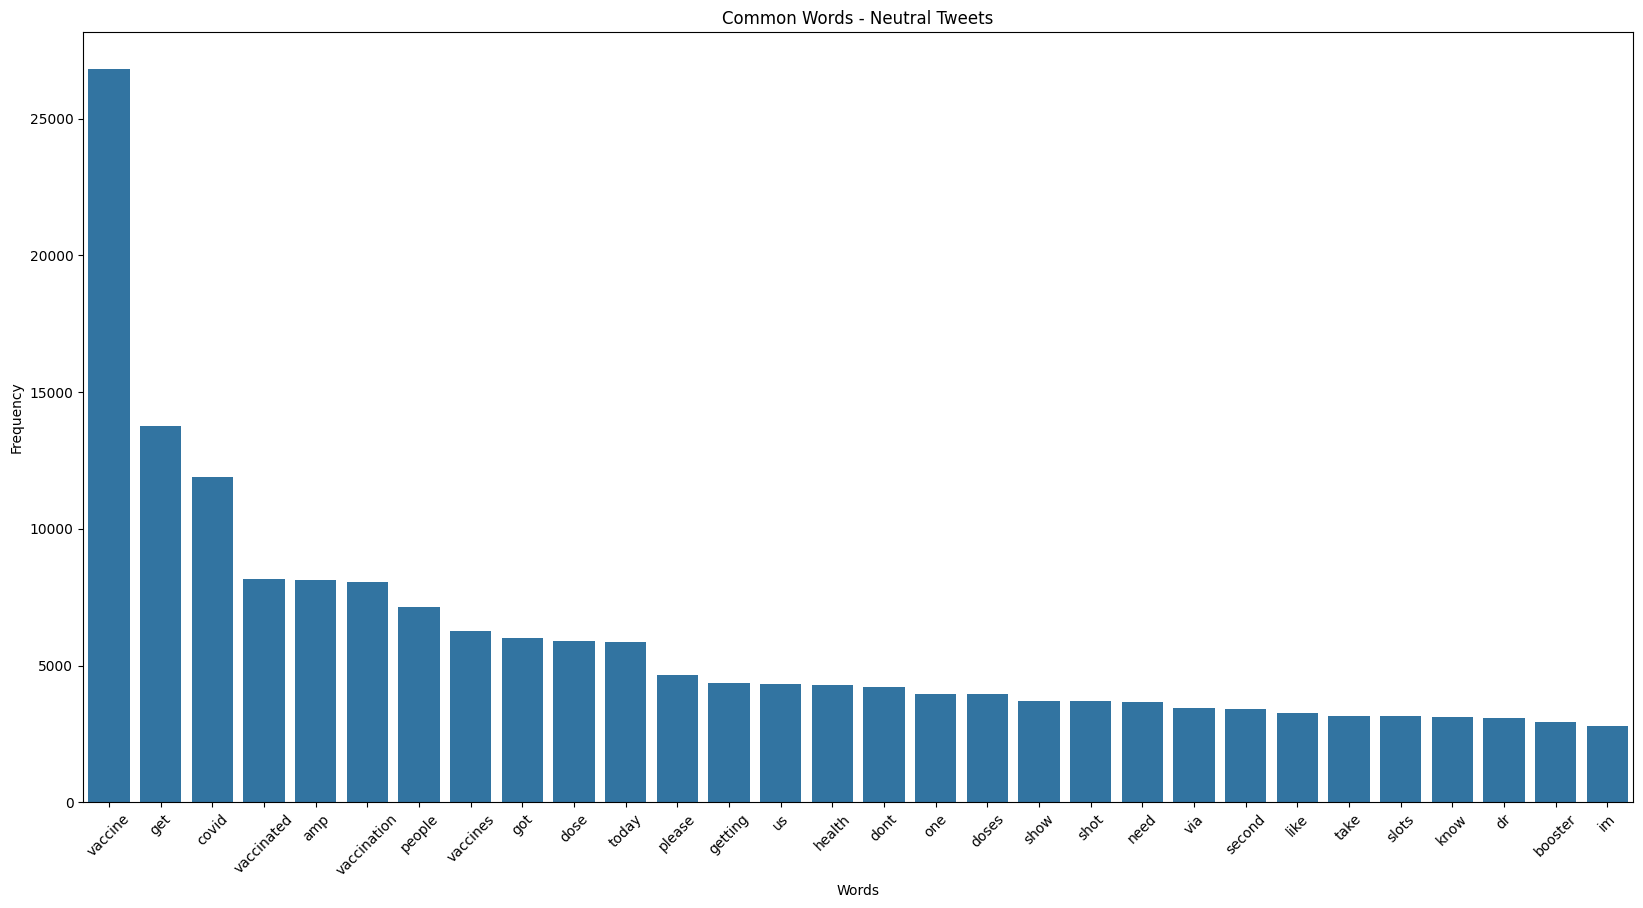

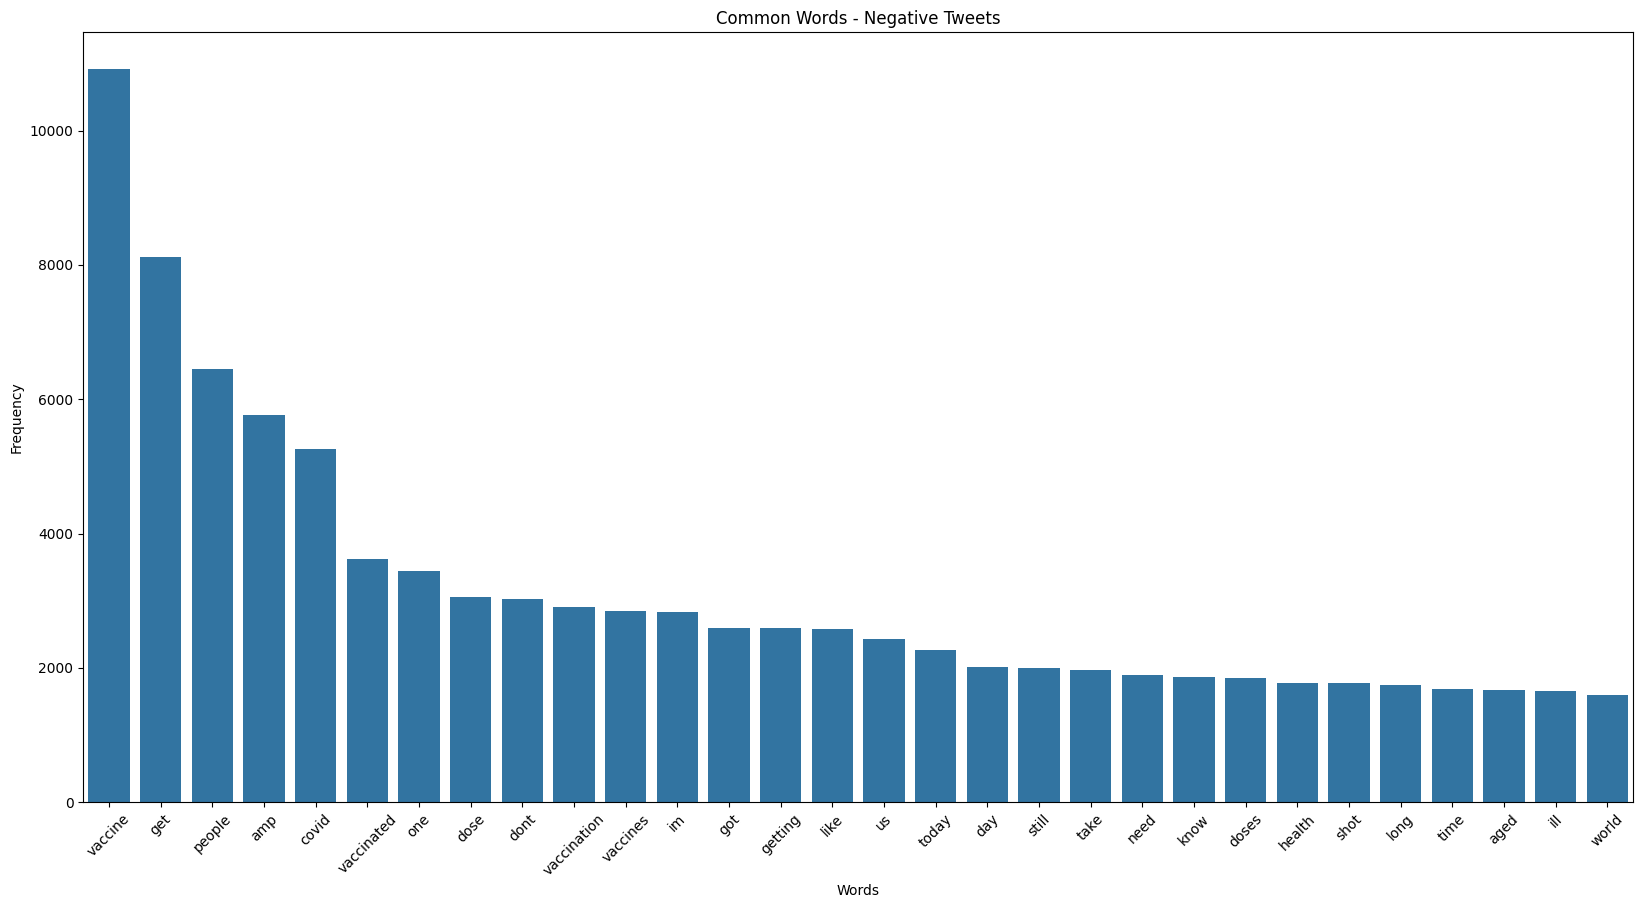

In [ ]:
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_words(label, title):
    text = " ".join(df_vaccine_tweets[df_vaccine_tweets['label'] == label]['clean_text'])
    tokens = [word.lower() for word in text.split() if word.isalpha() and word.lower() not in stop_words]
    freq = Counter(tokens).most_common(30)
    plt.figure(figsize=(20,10))
    sns.barplot(x=[x[0] for x in freq], y=[x[1] for x in freq])
    plt.xticks(rotation=45)
    plt.title(f'Common Words - {title} Tweets')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

get_top_words('Positive', 'Positive')
get_top_words('Neutral', 'Neutral')
get_top_words('Negative', 'Negative')


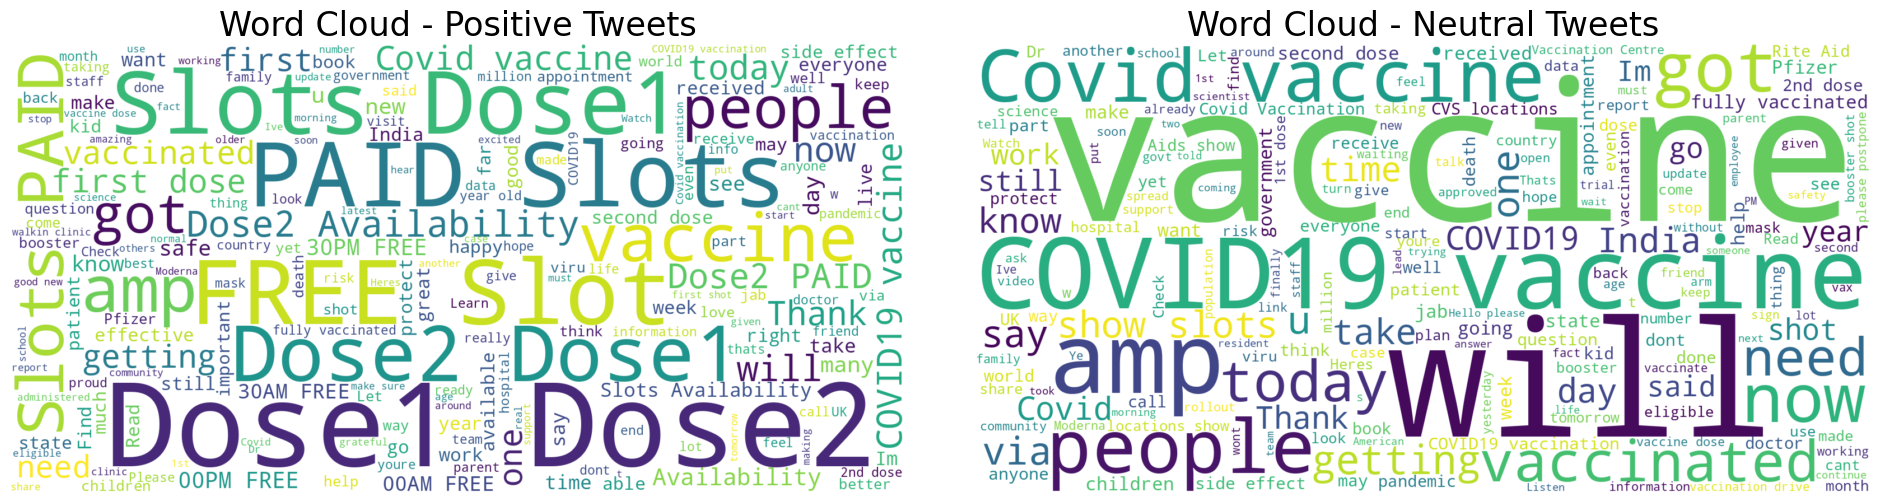

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def form_wordcloud(ax, docx, title):
    ax.set_title(title, fontsize=24)
    mywordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(docx)
    ax.imshow(mywordcloud, interpolation='bilinear')
    ax.axis('off')

positive_text = ' '.join(df_vaccine_tweets[df_vaccine_tweets['label'] == 'Positive']['clean_text'].astype(str))
neutral_text = ' '.join(df_vaccine_tweets[df_vaccine_tweets['label'] == 'Neutral']['clean_text'].astype(str))

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns
form_wordcloud(axs[0], positive_text, "Word Cloud - Positive Tweets")
form_wordcloud(axs[1], neutral_text, "Word Cloud - Neutral Tweets")

plt.tight_layout(pad=5.0)
plt.show()
